# Preparing GeoDataFrames from geographic data

Reading data into Python is usually the first step of an analysis workflow. There are various different GIS data formats available such as [Shapefile](https://en.wikipedia.org/wiki/Shapefile) [^shp], [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON) [^GeoJson], [KML](https://en.wikipedia.org/wiki/Keyhole_Markup_Language) [^KML], and [GeoPackage](https://en.wikipedia.org/wiki/GeoPackage) [^GPKG]. Geopandas is capable of reading data from all of these formats (plus many more). 

This tutorial will show some typical examples how to read (and write) data from different sources. The main point in this section is to demonstrate the basic syntax for reading and writing data using short code snippets. You can find the example data sets in the data-folder. However, most of the example databases do not exists, but you can use and modify the example syntax according to your own setup.

## Reading vector data

In `geopandas`, we can use a generic function `.from_file()` for reading in various vector data formats. When reading files with `geopandas`, the data are passed on to the `fiona` library under the hood for reading the data. This means that you can read and write all data formats supported by `fiona` with `geopandas`. 

In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In [2]:
import geopandas as gpd
import fiona

Let's check which drivers are supported by `fiona`.

In [3]:
fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

In the list of supported drivers, `r` is for file formats `fiona` can read, and `w` is for file formats it can write. Letter `a` marks formats for which `fiona` can append new data to existing files.

Let's read in some sample data to see the basic syntax.

In [4]:
# Read Esri Shapefile
fp = "data/Austin/austin_pop_2019.shp"
data = gpd.read_file(fp)
data.head()

,fid,pop2019,tract,geometry
0,1.0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3..."
1,2.0,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.330 3..."
2,3.0,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3..."
3,4.0,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3..."
4,5.0,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3..."


The same syntax works for other commong vector data formats. 

In [5]:
# Read file from Geopackage
fp = "data/Austin/austin_pop_2019.gpkg"
data = gpd.read_file(fp)

# Read file from GeoJSON
fp = "data/Austin/austin_pop_2019.geojson"
data = gpd.read_file(fp)

# Read file from MapInfo Tab
fp = "data/Austin/austin_pop_2019.tab"
data = gpd.read_file(fp)

Some file formats such as GeoPackage and File Geodatabase files may contain multiple layers with different names wihich can be speficied using the `layer` -parameter. Our example geopackage file has only one layer with the same name as the file, so we don't actually need to specify it to read in the data.

In [6]:
# Read spesific layer from Geopackage
fp = "data/Austin/austin_pop_2019.gpkg"
data = gpd.read_file(fp, layer="austin_pop_2019")

In [7]:
# Read file from File Geodatabase
#fp = "data/Finland/finland.gdb"
#data = gpd.read_file(fp, driver="OpenFileGDB", layer="municipalities")

(write intro about enabling additional drivers and reading in the KML file)

In [8]:
# Enable KML driver
gpd.io.file.fiona.drvsupport.supported_drivers["KML"] = "rw"

# Read file from KML
fp = "data/Austin/austin_pop_2019.kml"
#data = gpd.read_file(fp)

## Writing vector data

We can save spatial data to various vector data formats using the `.to_file()` function in `geopandas` which also relies on `fiona`. It is possible to specify the output file format using the `driver` parameter, however, for most file formats it is not needed as the tool is able to infer the driver from the file extension. 

In [9]:
# Write to Shapefile (just make a copy)
outfp = "data/temp/austin_pop_2019.shp"
data.to_file(outfp)

# Write to Geopackage (just make a copy)
outfp = "data/Temp/austin_pop_2019.gpkg"
data.to_file(outfp, driver="GPKG")

# Write to GeoJSON (just make a copy)
outfp = "data/Temp/austin_pop_2019.geojson"
data.to_file(outfp, driver="GeoJSON")

# Write to MapInfo Tab (just make a copy)
outfp = "data/Temp/austin_pop_2019.tab"
data.to_file(outfp)

# Write to same FileGDB (just add a new layer) - requires additional package installations(?)
# outfp = "data/finland.gdb"
# data.to_file(outfp, driver="FileGDB", layer="municipalities_copy")

# Write to KML (just make a copy)
outfp = "data/Temp/austin_pop_2019.kml"
#data.to_file(outfp, driver="KML")

## Creating a GeoDataFrame from scratch

It is possible to create spatial data from scratch by using `shapely`'s geometric objects and `geopandas`. This is useful as it makes it easy to convert, for example, a text file that contains coordinates into spatial data layers. Let's first try creating a simple `GeoDataFrame` based on coordinate information that represents the outlines of the [Senate square in Helsinki, Finland](https://fi.wikipedia.org/wiki/Senaatintori). Here are the coordinates based on which we can create a `Polygon` object using `shapely.

In [10]:
from shapely.geometry import Polygon

# Coordinates of the Helsinki Senate square in decimal degrees
coordinates = [
    (24.950899, 60.169158), (24.953492, 60.169158),
    (24.953510, 60.170104), (24.950958, 60.169990)
]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

Now we can use this polygon and `geopandas` to create a `GeoDataFrame` from scratch. The data can be passed in as a list-like object. In our case we will only have one row and one column of data. We can pass the polygon inside a list, and name the column as `geometry` so that `geopandas` will use the contents of that column the geometry column. Additionally, we could define the coordinate reference system for the data, but we will skip this step for now. For details of the syntax, see documentation for the `DataFrame` constructor and `GeoDataFrame` constructor online.

In [11]:
newdata = gpd.GeoDataFrame(data=[poly], columns=["geometry"])

In [12]:
newdata

,geometry
0,"POLYGON ((24.95090 60.16916, 24.95349 60.16916..."


We can also add additional attribute information to a new column. 

In [13]:
# Add a new column and insert data
newdata.at[0, "name"] = "Senate Square"

# Check the contents
newdata

,geometry,name
0,"POLYGON ((24.95090 60.16916, 24.95349 60.16916...",Senate Square


There it is! Now we have two columns in our data; one representing the geometry and another with additional attribute information. From here, you could proceed into adding additional rows of data, or printing out the data to a file. 

## Creating a GeoDataFrame from a text file

A common case is to have coordinates in a delimited textfile that needs to be converted into spatial data. We can make use of `pandas`, `geopandas` and `shapely` for doing this. 

The example data contains point coordinates of airports derived from [openflights.org](https://openflights.org/data.html) [^openflights]. Let's read in a couple of useful columns from the data for further processing.

In [14]:
import pandas as pd

In [15]:
airports = pd.read_csv("data/Airports/airports.txt", 
                       usecols=["Airport ID", "Name", "City", "Country", "Latitude", "Longitude"])

In [16]:
airports.head()

,Airport ID,Name,City,Country,Latitude,Longitude
0,1,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998
1,2,Madang Airport,Madang,Papua New Guinea,-5.207080,145.789001
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,-5.826790,144.296005
3,4,Nadzab Airport,Nadzab,Papua New Guinea,-6.569803,146.725977
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001


In [17]:
len(airports)

7698

There are over 7000 airports in the data and we can use the coordinate information available in the `Latitude` and `Longitude` columns for visualizing them on a map. The coordinates are stored as *{term}`Decimal degrees <Decimal degrees>`*, meaning that the appropriate coordinate reference system for these data is WGS 84 (EPSG:4326).  

There is a handy tool in `geopandas` for generating an array of `Point`objects based on x and y coordinates called `.points_from_xy()`. The tool assumes that x coordinates represent longitude and that y coordinates represent latitude. 

In [18]:
airports["geometry"] = gpd.points_from_xy(x=airports["Longitude"], 
                                          y=airports["Latitude"], 
                                         crs="EPSG:4326")

airports = gpd.GeoDataFrame(airports)
airports.head()

,Airport ID,Name,City,Country,Latitude,Longitude,geometry
0,1,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,POINT (145.39200 -6.08169)
1,2,Madang Airport,Madang,Papua New Guinea,-5.207080,145.789001,POINT (145.78900 -5.20708)
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,-5.826790,144.296005,POINT (144.29601 -5.82679)
3,4,Nadzab Airport,Nadzab,Papua New Guinea,-6.569803,146.725977,POINT (146.72598 -6.56980)
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001,POINT (147.22000 -9.44338)


Now we have the point geometries as `shapely`objects in the geometry-column ready to be plotted on a map.

<AxesSubplot: >

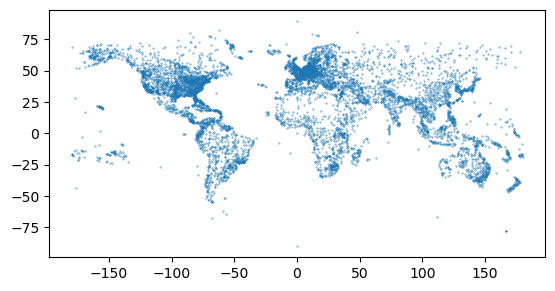

In [19]:
airports.plot(markersize=.1)

_**Figure 6.12**. A basic plot showing the airports from openflights.org._

## Footnotes

[^GeoJson]: <https://en.wikipedia.org/wiki/GeoJSON>
[^GPKG]: <https://en.wikipedia.org/wiki/GeoPackage>
[^KML]: <https://en.wikipedia.org/wiki/Keyhole_Markup_Language>
[^openflights]: <https://openflights.org/data.html>
[^shp]: <https://en.wikipedia.org/wiki/Shapefile> 